In [2]:
import pandas as pd
import numpy as np
import os

In [4]:
data = pd.read_excel("Medication_adherence_data.xlsx")  
data.head()

,Dificulty,Forgeting,Discontinue,Stop_ADR,Stop_witDr,Discontinuing-OtherMed,hassel,Missing,Altering_,Money,Expensive,Level_Cat
0,3,2,3,3,3,2,2,2,2,1,1,Low Adhe
1,2,3,2,2,3,2,2,2,1,2,1,Low Adhe
2,3,3,2,3,3,2,2,2,2,2,3,High Adh
3,2,3,3,2,3,2,2,3,3,2,2,High Adh
4,3,2,2,3,3,1,2,1,2,1,2,Low Adhe


In [3]:
X = data.drop("Level_Cat", axis=1)
y = data['Level_Cat']
print(X)
print(y)

     Dificulty  Forgeting  Discontinue  Stop_ADR  Stop_witDr  \
0            3          2            3         3           3   
1            2          3            2         2           3   
2            3          3            2         3           3   
3            2          3            3         2           3   
4            3          2            2         3           3   
..         ...        ...          ...       ...         ...   
398          3          3            3         3           3   
399          3          3            3         3           3   
400          3          3            3         3           3   
401          3          2            2         2           3   
402          2          1            2         2           2   

     Discontinuing-OtherMed  hassel  Missing  Altering_  Money  Expensive  
0                         2       2        2          2      1          1  
1                         2       2        2          1      2          1  
2  

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(data['year'], data['per capita income (US$)'],color="green",marker='+')

In [4]:
from sklearn.model_selection import train_test_split 
x_train, x_test,y_train, y_test = train_test_split(X,y,test_size=0.2)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy_score=accuracy_score(y_test,y_pred)
print(accuracy_score)

print(model.coef_)
print(model.intercept_)

1.0
[[-1.17001327 -2.24364097 -1.0541119  -0.41714669 -1.53817316 -1.73868803
  -1.52311516 -1.14027747 -1.67219883 -0.90283475 -1.33053057]]
[34.70207613]


In [6]:
model.predict([[1,2,2,2,3,3,2,3,3,1,2]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Low Adhe'], dtype=object)

In [7]:
model.predict([[5,2,2,2,3,3,2,6,3,1,2]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['High Adh'], dtype=object)

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[21,  0],
       [ 0, 60]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

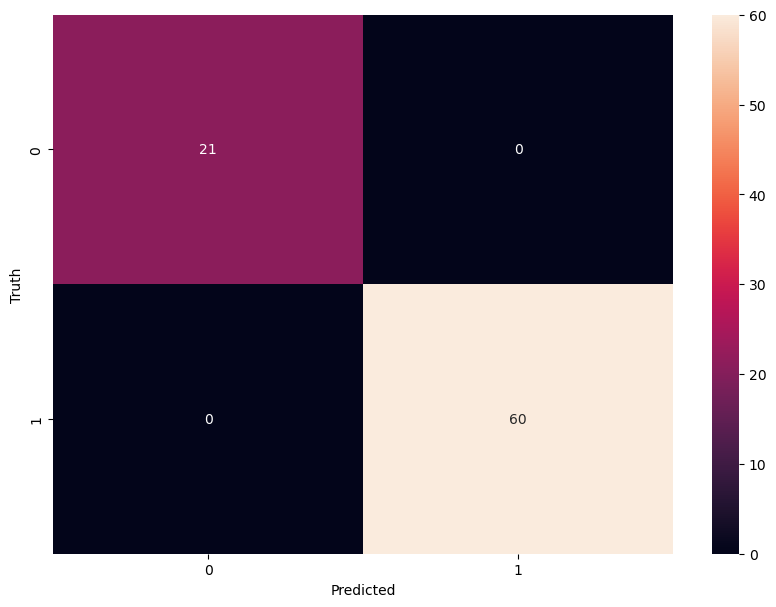

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')